In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


# Data Preprocessing


In [ ]:
#Read the Dataset
df = pd.read_csv('data_csv.csv')
df.head()

In [ ]:
#Pandas Profiling, generate a data profiling report for a Pandas DataFrame and then save that report to an HTML file.
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'ASD.html')

In [ ]:
# function called save_fig for saving figures or plots generated in your data preprocessing or analysis
# function is designed to save the figures as image files in a specific directory.

import os
from pathlib import Path

IMAGES_PATH = Path() / "images" / "Data Preprocessing"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()


In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
# categorical data into numerical form
from sklearn.preprocessing import LabelEncoder
# Define the categorical columns you want to label encode
categorical_columns = ['Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 
                       'Global developmental delay/intellectual disability',
                       'Social/Behavioural Issues', 'Childhood Autism Rating Scale', 'Anxiety_disorder', 
                       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits']

for column in categorical_columns:
    labelencoder = LabelEncoder()
    
    df[column] = labelencoder.fit_transform(df[column])


In [ ]:
df.head(1)

In [ ]:
#handling null values
df.isnull().sum()

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.head(5)

# Download preprocessed data

In [ ]:
df.to_csv(index=False)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='preprocessed.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [ ]:
from pathlib import Path

folder_path = Path('C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_Project/sha')
filepath = folder_path / 'preprocessed.csv'

folder_path.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)


In [ ]:
>>> import os  
>>> os.makedirs('folder/subfolder', exist_ok=True)  
>>> df.to_csv('folder/subfolder/out.csv')  

In [ ]:
import os

folder_path = 'C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_Project/sha'
os.makedirs(folder_path, exist_ok=True)

df.to_csv(os.path.join(folder_path, 'preprocessed.csv'))


# ML

In [ ]:
X = df.drop(columns=["Learning disorder", "CASE_NO_PATIENT'S"], axis=1)
y= df['Learning disorder']


seperate train 80 and test 20 set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

save train and testset

In [ ]:
import pandas as pd
import os

# Specify the folder paths C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_Project/sha
train_folder = "C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_Project\\sha\\train"
test_folder = "C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\test"

# Create the folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Save X_train and y_train as CSV files in the "train" folder
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv(os.path.join(train_folder, "train_data.csv"), index=False)

# Save X_test and y_test as CSV files in the "test" folder
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv(os.path.join(test_folder, "test_data.csv"), index=False)


In [ ]:
#Importing ML Algorithms to test

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
def Results(clf):
    print(clf)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print('Train Accuracy', accuracy_score(y_train, clf.predict(X_train)))
    print('Test Accuracy', accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    #also pretty confusion matrix
    print("-" * 60)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn2 = KNeighborsClassifier(n_neighbors = 15)
dt1 = DecisionTreeClassifier() #Gini
dt2 = DecisionTreeClassifier(criterion = 'entropy') #entropy
rf = RandomForestClassifier()
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(X, y)
logr = LogisticRegression()

classifiers = [dummy,  dt1, dt2, rf, knn, knn2, logr]

for clf in classifiers:
    Results(clf)

# save result in result seperately
also has csv, doc and images png

In [ ]:
import pandas as pd
from docx import Document
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.shared import Pt
from docx.oxml.ns import qn
from docx.oxml import OxmlElement
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import numpy as np

# Define a function to save the results to both a CSV and a DOCX file
def save_results_to_files(clf, csv_file_path, docx_file_path):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)

    # Save results to CSV file
    with open(csv_file_path, 'w') as file:
        file.write(f"Train Accuracy: {train_accuracy*100:.4f}%\n")
        file.write(f"Test Accuracy: {test_accuracy*100:.4f}%\n")
        file.write("Confusion Matrix:\n")
        file.write(str(confusion) + "\n")
        file.write("Classification Report:\n")

        # Split the classification report into lines
        report_lines = classification_report(y_test, predictions).split('\n')
        for line in report_lines:
            # Check if the line is not empty
            if line:
                # Split the line into words
                words = line.split()
                # Format precision, recall, f1-score, and support as percentages
                formatted_line = ' '.join([f'{float(word)*100:.4f}%' if '%' in word else word for word in words])
                file.write(formatted_line + '\n')

    # Save results to DOCX file
    document = Document()
    document.add_heading('Classifier Results', 0)

    # Create a table for the results
    table = document.add_table(rows=1, cols=2)
    table.style = 'Table Grid'

    # Add header row to the table
    header_cells = table.rows[0].cells
    header_cells[0].text = 'Metric'
    header_cells[1].text = 'Value'

    # Add rows to the table
    rows = [('Train Accuracy', f'{train_accuracy*100:.4f}%'),
            ('Test Accuracy', f'{test_accuracy*100:.4f}%'),
            ('Confusion Matrix', classification_report(y_test, predictions)),
            ('Classification Report', classification_report(y_test, predictions))]

    for metric, value in rows:
        row_cells = table.add_row().cells
        row_cells[0].text = metric
        row_cells[1].text = value

    # Save the DOCX file
    document.save(docx_file_path)

    # Save the confusion matrix as a PNG
    save_confusion_matrix_as_png(confusion, clf)

# Function to save the confusion matrix as a PNG image
def save_confusion_matrix_as_png(matrix, clf):
    # Create a custom color map with specified colors
    colors = ['#B1BCE6', '#B2C8DF', '#C4D7E0', '#EFEFEF']
    cmap = LinearSegmentedColormap.from_list('Custom', colors, N=matrix.max() + 1)

    # Plot the confusion matrix with the custom color map
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.colorbar()

    # Add labels to the confusion matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, matrix[i, j], horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

    plt.title(f'Confusion Matrix - {clf}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Save the confusion matrix as a PNG image
    plt.savefig(f"{result_directory}/{clf}_confusion_matrix.png", bbox_inches='tight', dpi=100)
    plt.close()

# Specify the directory for saving the result files Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\
result_directory = "C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\result\\"

# List of classifiers to evaluate
classifiers = [dummy, dt1, dt2, rf, knn, knn2, logr]

for clf in classifiers:
    # Generate file names based on the classifier's name
    classifier_name = clf.__class__.__name__
    csv_file_path = result_directory + f"{classifier_name}_results.csv"
    docx_file_path = result_directory + f"{classifier_name}_results.docx"

    # Call the function to save the results
    save_results_to_files(clf, csv_file_path, docx_file_path)


bar chart for test and train set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of classifiers
classifiers = [dummy, dt1, dt2, rf, knn, knn2, logr]

# Train and test accuracies for each classifier
train_accuracies = [accuracy_score(y_train, clf.predict(X_train)) for clf in classifiers]
test_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers]

# Bar positions
positions = np.arange(len(classifiers))

# Bar height
bar_height = 0.35

# Bar colors
train_colors = ['#7895B2'] * len(classifiers)
test_colors = ['#D2DAFF'] * len(classifiers)

# Create the horizontal bar chart for train set accuracy
plt.figure(figsize=(10, 6))
plt.barh(positions - bar_height/2, train_accuracies, bar_height, label='Train Set Accuracy', color=train_colors, edgecolor='black', linewidth=0.5)

# Create the horizontal bar chart for test set accuracy
plt.barh(positions + bar_height/2, test_accuracies, bar_height, label='Test Set Accuracy', color=test_colors, edgecolor='black', linewidth=0.5)

# Add accuracy percentages on top of each bar
for i in range(len(classifiers)):
    plt.text(train_accuracies[i] + 0.005, i - bar_height / 2, f'{train_accuracies[i]*100:.2f}%', color='black', ha='left')
    plt.text(test_accuracies[i] + 0.005, i + bar_height / 2, f'{test_accuracies[i]*100:.2f}%', color='black', ha='left')

# Set the y-axis labels
plt.yticks(positions, ['Dummy', 'Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Random Forest', 'K-Nearest Neighbors (k=5)', 'K-Nearest Neighbors (k=15)', 'Logistic Regression'])

# Set the x-axis label
plt.xlabel('Accuracy')

# Set the chart title
plt.title('Classifier Train and Test Set Accuracy')

# Set x-axis limits to provide more space for the labels
plt.xlim(0, 1.3)

# Show the legend
plt.legend(loc='best')

# Display the plot
plt.tight_layout()

# Save the plot to the specified destination in high definition
plot_save_path = "C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\result2\\classifier_accuracy_horizontal.png"
plt.savefig(plot_save_path, bbox_inches='tight', dpi=300)
plt.show()


# save the result in results.csv FINAL

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load the training and testing data from CSV files
train_data = pd.read_csv("C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\train\\train_data.csv")
test_data = pd.read_csv("C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\test\\test_data.csv")

# Separate features (X) and target (y) for both training and testing data
X_train = train_data.drop(columns=["Learning disorder"])
y_train = train_data["Learning disorder"]
X_test = test_data.drop(columns=["Learning disorder"])
y_test = test_data["Learning disorder"]

# Create a dictionary to store results
results = {}

# Initialize and evaluate different classifiers
classifiers = {
    "Dummy Classifier": DummyClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, classifier in classifiers.items():
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    
    # Make predictions on the testing data
    predictions = classifier.predict(X_test)
    
    # Evaluate the classifier and store the results
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    
    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": matrix
    }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Specify the path to save the results as a CSV file
results_csv_path = "C:\\Shanila\\CSE\\cse445\\final_project\\git_project\\Machine_Learning_project\\sha\\results.csv"

# Save the results as a CSV file
results_df.to_csv(results_csv_path, index=False)

# Optionally, you can also display the results DataFrame
print(results_df)


## HYPERPARAMETER TUNING 

entropy

In [ ]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

gini

In [ ]:
### Manual Hyperparameter Tuning 2
model=RandomForestClassifier(n_estimators=500,criterion='gini',
                             max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the hyperparameters for each search method
manual_search_hyperparameters = [[300, 'entropy', 'sqrt', 10], [500, 'gini', 'sqrt', 10]]
accuracy_scores = [0.9948453608247423, 0.9948453608247423]

# Create a new list that contains the corresponding elements from each list
x = []
y = []
for hyperparameters, accuracy_score in zip(manual_search_hyperparameters, accuracy_scores):
    x.append(hyperparameters[0])
    y.append(accuracy_score)

# Create a scatter plot of the hyperparameters
plt.scatter(x, y, label='Manual search')

# Add labels and a title
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy scores for different hyperparameters')
plt.legend()

# Save the plot as a PNG image
plt.savefig('C:\\Shanila\\CSE\\cse445\\final_project\\git_project\Machine_Learning_Project\\sha\\result4\\manual_search_plot.png', dpi=300)


# Randomized search

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
# num of features 26
random_grid = {
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt', 'log2'] + list(range(1, 27)) + [0.1, 0.2, 0.3, None],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['entropy', 'gini']
}
print(random_grid)

 performing hyperparameter tuning for a Random Forest classifier using Randomized Search

In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

comparison between entropy and gini graph

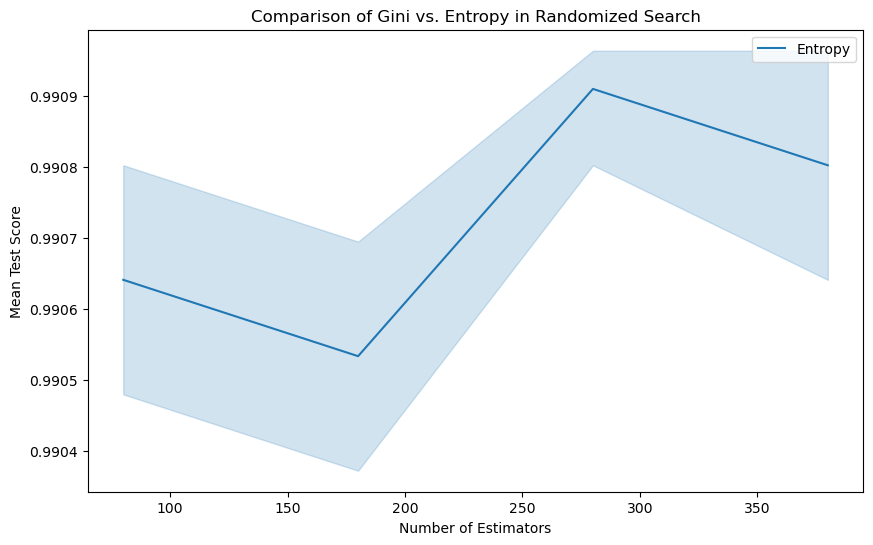

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant data for Gini and Entropy configurations
gini_mask = results['param_criterion'] == 'gini'
entropy_mask = results['param_criterion'] == 'entropy'

gini_results = {
    'n_estimators': np.array(results['param_n_estimators'])[gini_mask],
    'mean_test_score': np.array(results['mean_test_score'])[gini_mask]
}

entropy_results = {
    'n_estimators': np.array(results['param_n_estimators'])[entropy_mask],
    'mean_test_score': np.array(results['mean_test_score'])[entropy_mask]
}

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the comparison
sns.lineplot(x=gini_results['n_estimators'], y=gini_results['mean_test_score'], label='Gini')
sns.lineplot(x=entropy_results['n_estimators'], y=entropy_results['mean_test_score'], label='Entropy')

# Customize the plot
plt.title('Comparison of Gini vs. Entropy in Randomized Search')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.legend()

# Save the plot as a PNG file 
save_path = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\result3\comparison2_plot.png'
plt.savefig(save_path, bbox_inches='tight')

# Show the plot (optional)
plt.show()


seperate gini and entropy graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


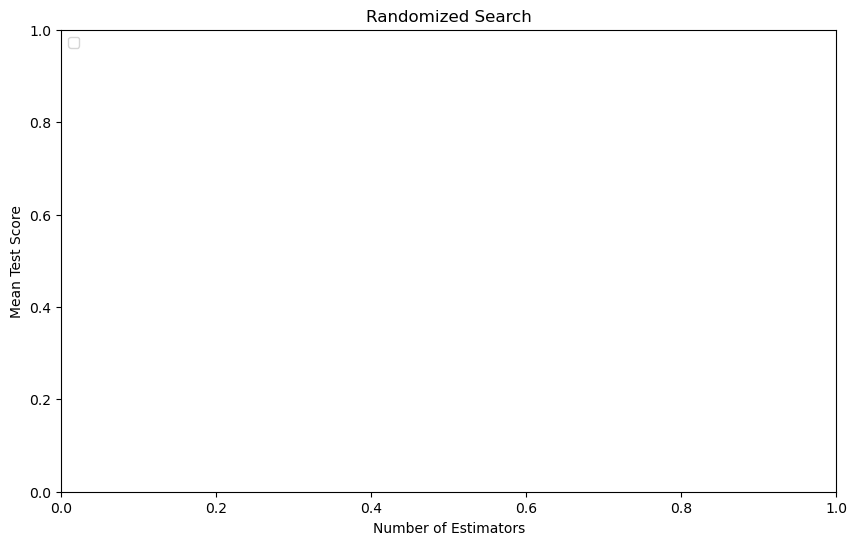

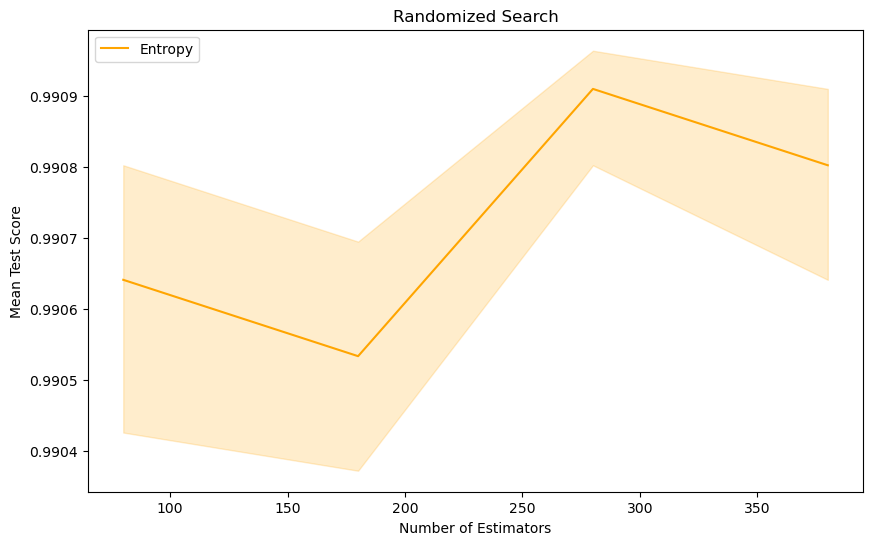

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant data for Gini and Entropy configurations
gini_mask = results['param_criterion'] == 'gini'
entropy_mask = results['param_criterion'] == 'entropy'

gini_results = {
    'n_estimators': np.array(results['param_n_estimators'])[gini_mask],
    'mean_test_score': np.array(results['mean_test_score'])[gini_mask]
}

entropy_results = {
    'n_estimators': np.array(results['param_n_estimators'])[entropy_mask],
    'mean_test_score': np.array(results['mean_test_score'])[entropy_mask]
}

# Create a figure and axes for the Gini plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Gini results in blue
sns.lineplot(x=gini_results['n_estimators'], y=gini_results['mean_test_score'], label='Gini', ax=ax1, color='blue')

# Customize the Gini plot
ax1.set_title('Randomized Search')
ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('Mean Test Score')
ax1.legend(loc='upper left')

# Create a figure and axes for the Entropy plot
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot the Entropy results in orange
sns.lineplot(x=entropy_results['n_estimators'], y=entropy_results['mean_test_score'], label='Entropy', ax=ax2, color='orange')

# Customize the Entropy plot
ax2.set_title('Randomized Search')
ax2.set_xlabel('Number of Estimators')
ax2.set_ylabel('Mean Test Score')
ax2.legend(loc='upper left')

# Save the Gini and Entropy plots as PNG files
save_path_gini = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\result3\gini_plot.png'
save_path_entropy = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\result3\entropy_plot.png'
plt.savefig(save_path_gini, bbox_inches='tight')
plt.savefig(save_path_entropy, bbox_inches='tight')

# Show the plots (optional)
plt.show()


In [23]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define your parameter grid
n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num=10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 10, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': ['auto', 'sqrt', 'log2'] + list(range(1, 27)) + [0.1, 0.2, 0.3, None],
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['entropy', 'gini']
}

# Create your RandomForestClassifier
rf = RandomForestClassifier()

# Create RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=100,
    n_jobs=-1
)

# Fit the randomized model
rf_randomcv.fit(X_train, y_train)

# Access the results
results = rf_randomcv.cv_results_

# Print or use the 'results' variable for visualization
print(results)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'mean_fit_time': array([1.06807303, 1.00800323, 0.72957786, 0.69509896, 0.13670746,
       0.41849796, 0.12006656, 0.74870412, 0.66241622, 0.20442025]), 'std_fit_time': array([0.03461407, 0.0369456 , 0.01208609, 0.0371966 , 0.01163713,
       0.00741355, 0.00267846, 0.01329784, 0.02292108, 0.01239926]), 'mean_score_time': array([0.08514539, 0.08049607, 0.05632361, 0.05900621, 0.01720126,
       0.04451807, 0.0211037 , 0.04937998, 0.05545076, 0.02292236]), 'std_score_time': array([0.01064091, 0.00368888, 0.00684132, 0.00287955, 0.00170917,
       0.00417534, 0.00340654, 0.00580348, 0.00419433, 0.00372854]), 'param_n_estimators': masked_array(data=[180, 180, 120, 120, 20, 80, 20, 140, 140, 40],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 2, 5, 5, 14, 5, 5, 5, 5, 14]

In [24]:
results = rf_randomcv.cv_results_


In [25]:
rf_randomcv.best_params_

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 14,
 'max_depth': 10,
 'criterion': 'entropy'}

In [26]:
rf_randomcv


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 10, 10, 10, 10, 10,
                                                      10, 10, 10, 10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         0.1, ...],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=100, verbose=2)

In [27]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=14,
                       min_samples_leaf=4, n_estimators=180)

In [28]:
best_random_grid=rf_randomcv.best_estimator_

In [29]:
from sklearn.metrics import accuracy_score
best_random_grid.fit(X_train, y_train)
y_pred=best_random_grid.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Accuracy Score 0.9948453608247423
Classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       179
           1       1.00      0.99      1.00       209

    accuracy                           0.99       388
   macro avg       0.99      1.00      0.99       388
weighted avg       0.99      0.99      0.99       388



save random search model best result

In [30]:
from sklearn.metrics import accuracy_score, classification_report

best_random_grid.fit(X_train, y_train)
y_pred = best_random_grid.predict(X_test)

accuracy_score_model = accuracy_score(y_test, y_pred)
classification_report_model = classification_report(y_test, y_pred)

# Define the file path
result_folder = 'C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/result3/'
result_file_path = result_folder + 'randomized_search_model.txt'

# Open the file for writing
with open(result_file_path, 'w') as file:
    file.write("Accuracy Score:\n")
    file.write(f"{accuracy_score_model}\n\n")

    file.write("Classification Report:\n")
    file.write(f"{classification_report_model}\n")

print(f"Results saved to {result_file_path}")


Results saved to C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/result3/randomized_search_model.txt


## grid search

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf'] + 2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [split for split in range(2, 6)],  # Choose valid values within the range
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}


print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': [14], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [2, 3, 4, 5], 'n_estimators': [-20, 80, 180, 280, 380]}


In [32]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': [14], 'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [-20, 80, 180, 280, 380]},
             verbose=2)

In [33]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=14,
                       min_samples_leaf=4, n_estimators=80)

In [34]:
best_grid=grid_search.best_estimator_

In [35]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=14,
                       min_samples_leaf=4, n_estimators=80)

In [36]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[179   0]
 [  2 207]]
Accuracy Score 0.9948453608247423
Classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       179
           1       1.00      0.99      1.00       209

    accuracy                           0.99       388
   macro avg       0.99      1.00      0.99       388
weighted avg       0.99      0.99      0.99       388



save grid search result

In [37]:
import pandas as pd
# Access the results from the grid search
results = grid_search.cv_results_
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)
# Specify the file path for saving the results as a TSV (text) file
result_file_path = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\result3\grid_search_results.txt'
# Save the results to a TSV file
results_df.to_csv(result_file_path, sep='\t', index=False)


generate graph for grid search

In [42]:
# Import necessary libraries
import numpy as np

# Load the results from the specified file
results_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_Project\sha\result3\grid_search_results.txt'

with open(results_file, 'r') as file:
    results_data = file.read()

# Split the data into Gini and Entropy sections
gini_section, entropy_section = results_data.split("Entropy:")

# Extract and process Gini and Entropy results
def process_results(section):
    lines = section.strip().split('\n')[1:]  # Skip the header line
    results = {}
    for line in lines:
        parts = line.split()
        param_name = parts[0][:-1]
        param_value = float(parts[1])
        results[param_name] = param_value
    return results

gini_results = process_results(gini_section)
entropy_results = process_results(entropy_section)

# Compare the results
comparison = {}
for param_name in gini_results:
    gini_value = gini_results[param_name]
    entropy_value = entropy_results[param_name]
    comparison[param_name] = {
        'Gini': gini_value,
        'Entropy': entropy_value,
        'Difference': gini_value - entropy_value
    }

# Save the comparison to a text file
output_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_Project\sha\result2\comparison.txt'
with open(output_file, 'w') as file:
    file.write("Parameter  Gini  Entropy  Difference\n")
    for param_name, values in comparison.items():
        file.write(f"{param_name}: {values['Gini']} {values['Entropy']} {values['Difference']}\n")


ValueError: not enough values to unpack (expected 2, got 1)

## optuna

hyperparameter tuning using optuna 

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the objective function that Optuna will optimize
def objective(trial):
    # Define hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Create the model with the hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        random_state=42  # You can set a random seed for reproducibility
    )

    # Calculate the cross-validation score (change this according to your dataset)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_cv_score = cv_scores.mean()

    return mean_cv_score

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize the cross-validation score

# Start the optimization process
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


# Optimizing Hyperparameters for Each Algorithm Separately

Dummy classifier, hyperparameter optimization random search, grid search, baysean optimization and optuna

In [ ]:
import numpy as np
np.int = int

In [ ]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
import optuna
from sklearn.metrics import accuracy_score\


# Load the training and testing data from CSV files
train_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/train/train_data.csv")
test_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/test/test_data.csv")

# Separate features (X) and target (y) for both training and testing data
X_train = train_data.drop(columns=["Learning disorder"])
y_train = train_data["Learning disorder"]
X_test = test_data.drop(columns=["Learning disorder"])
y_test = test_data["Learning disorder"]

# Define the hyperparameter search space for the Dummy Classifier
param_dist_dummy = {
    'strategy': ['most_frequent', 'stratified', 'prior', 'uniform']
}

# Perform hyperparameter optimization for Dummy Classifier using RandomizedSearchCV, GridSearchCV, BayesSearchCV, or Optuna
# Random Search
dummy_random_search = RandomizedSearchCV(DummyClassifier(), param_distributions=param_dist_dummy, n_iter=10, cv=5, n_jobs=-1)
dummy_random_search.fit(X_train, y_train)
random_search_accuracy = dummy_random_search.score(X_test, y_test)

# Grid Search
dummy_grid_search = GridSearchCV(DummyClassifier(), param_grid=param_dist_dummy, cv=5, n_jobs=-1)
dummy_grid_search.fit(X_train, y_train)
grid_search_accuracy = dummy_grid_search.score(X_test, y_test)

# Bayesian Optimization
bayesian_opt = BayesSearchCV(DummyClassifier(), search_spaces=param_dist_dummy, n_iter=50, cv=5, n_jobs=-1)
bayesian_opt.fit(X_train, y_train)
bayesian_opt_accuracy = bayesian_opt.score(X_test, y_test)

# Optuna
def objective(trial):
    strategy = trial.suggest_categorical('strategy', ['most_frequent', 'stratified', 'prior', 'uniform'])
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train, y_train)
    return dummy.score(X_test, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
optuna_best_accuracy = study.best_value

# Step 5: Save the accuracy results to a text file
results_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\hyperparameter_optimization\dummy_classifier_results.txt'

with open(results_file, 'w') as file:
    file.write(f'Random Search Accuracy: {random_search_accuracy}\n')
    file.write(f'Grid Search Accuracy: {grid_search_accuracy}\n')
    file.write(f'Bayesian Optimization Accuracy: {bayesian_opt_accuracy}\n')
    file.write(f'Optuna Best Accuracy: {optuna_best_accuracy}\n')


decision tree classifier, hyperparameter optimization random search, grid search, baysean optimization and optuna

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
import optuna
from sklearn.metrics import accuracy_score

# Load the training and testing data from CSV files
train_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/train/train_data.csv")
test_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/test/test_data.csv")

# Separate features (X) and target (y) for both training and testing data
X_train = train_data.drop(columns=["Learning disorder"])
y_train = train_data["Learning disorder"]
X_test = test_data.drop(columns=["Learning disorder"])
y_test = test_data["Learning disorder"]

# Define the hyperparameter search space for the Decision Tree
param_dist_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter optimization for Decision Tree using RandomizedSearchCV, GridSearchCV, BayesSearchCV, or Optuna
# Random Search
decision_tree_random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist_decision_tree, n_iter=10, cv=5, n_jobs=-1)
decision_tree_random_search.fit(X_train, y_train)
random_search_accuracy = decision_tree_random_search.score(X_test, y_test)

# Grid Search
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dist_decision_tree, cv=5, n_jobs=-1)
decision_tree_grid_search.fit(X_train, y_train)
grid_search_accuracy = decision_tree_grid_search.score(X_test, y_test)

# Bayesian Optimization
bayesian_opt = BayesSearchCV(DecisionTreeClassifier(), search_spaces=param_dist_decision_tree, n_iter=50, cv=5, n_jobs=-1)
bayesian_opt.fit(X_train, y_train)
bayesian_opt_accuracy = bayesian_opt.score(X_test, y_test)

# Optuna
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4)
    }
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
optuna_best_accuracy = study.best_value

# Step 5: Save the accuracy results to a text file
results_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\hyperparameter_optimization\decision_tree_results.txt'

with open(results_file, 'w') as file:
    file.write(f'Random Search Accuracy: {random_search_accuracy}\n')
    file.write(f'Grid Search Accuracy: {grid_search_accuracy}\n')
    file.write(f'Bayesian Optimization Accuracy: {bayesian_opt_accuracy}\n')
    file.write(f'Optuna Best Accuracy: {optuna_best_accuracy}\n')


knn classifier, hyperparameter optimization random search, grid search, baysean optimization and optuna

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
import optuna
from sklearn.metrics import accuracy_score

# Load the training and testing data from CSV files
train_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/train/train_data.csv")
test_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/test/test_data.csv")

# Separate features (X) and target (y) for both training and testing data
X_train = train_data.drop(columns=["Learning disorder"])
y_train = train_data["Learning disorder"]
X_test = test_data.drop(columns=["Learning disorder"])
y_test = test_data["Learning disorder"]

# Define the hyperparameter search space for the KNN Classifier
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform hyperparameter optimization for KNN Classifier using RandomizedSearchCV
# Random Search
knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=10, cv=5, n_jobs=-1)
knn_random_search.fit(X_train, y_train)
random_search_accuracy = knn_random_search.score(X_test, y_test)

# Grid Search
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_dist_knn, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
grid_search_accuracy = knn_grid_search.score(X_test, y_test)

# Bayesian Optimization (BayesSearchCV)
bayesian_opt = BayesSearchCV(KNeighborsClassifier(), search_spaces=param_dist_knn, n_iter=50, cv=5, n_jobs=-1)
bayesian_opt.fit(X_train, y_train)
bayesian_opt_accuracy = bayesian_opt.score(X_test, y_test)

# Optuna
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 9)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_categorical('p', [1, 2])
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
    knn.fit(X_train, y_train)
    return knn.score(X_test, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
optuna_best_accuracy = study.best_value

# Step 5: Save the accuracy results to a text file
results_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\hyperparameter_optimization\knn_classifier_results.txt'

with open(results_file, 'w') as file:
    file.write(f'Random Search Accuracy: {random_search_accuracy}\n')
    file.write(f'Grid Search Accuracy: {grid_search_accuracy}\n')
    file.write(f'Bayesian Optimization Accuracy: {bayesian_opt_accuracy}\n')
    file.write(f'Optuna Best Accuracy: {optuna_best_accuracy}\n')


Logistic Regression, hyperparameter optimization random search, grid search, baysean optimization and optuna

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
import optuna
from sklearn.metrics import accuracy_score
import traceback

# Load the training and testing data from CSV files
train_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/train/train_data.csv")
test_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/test/test_data.csv")

# Separate features (X) and target (y) for both training and testing data
X_train = train_data.drop(columns=["Learning disorder"])
y_train = train_data["Learning disorder"]
X_test = test_data.drop(columns=["Learning disorder"])
y_test = test_data["Learning disorder"]

# Define the hyperparameter search space for Logistic Regression
param_dist_logistic = {
    'penalty': ['l2'],  # Use 'l2' penalty for 'lbfgs' solver
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 1000, 10000]
}

# Random Search
logistic_random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist_logistic, n_iter=10, cv=5, n_jobs=-1)
logistic_random_search.fit(X_train, y_train)
random_search_accuracy = logistic_random_search.score(X_test, y_test)

# Grid Search
logistic_grid_search = GridSearchCV(LogisticRegression(), param_grid=param_dist_logistic, cv=5, n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)
grid_search_accuracy = logistic_grid_search.score(X_test, y_test)

# Bayesian Optimization
bayesian_opt = BayesSearchCV(LogisticRegression(), search_spaces=param_dist_logistic, n_iter=50, cv=5, n_jobs=-1)
bayesian_opt.fit(X_train, y_train)
bayesian_opt_accuracy = bayesian_opt.score(X_test, y_test)

# Optuna
def objective(trial):
    try:
        penalty = 'l2'  # Use 'l2' penalty for 'lbfgs' solver
        C = trial.suggest_float('C', 1e-5, 1e5, log=True)
        solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'saga'])
        max_iter = trial.suggest_int('max_iter', 100, 10000)

        logistic = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter)
        logistic.fit(X_train, y_train)
        return logistic.score(X_test, y_test)
    except Exception as e:
        print(f"Trial failed: {str(e)}")
        traceback.print_exc()
        return float('nan')

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
optuna_best_accuracy = study.best_value

# Step 5: Save the accuracy results to a text file
results_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\hyperparameter_optimization\logistic_regression_results.txt'

with open(results_file, 'w') as file:
    file.write(f'Random Search Accuracy: {random_search_accuracy}\n')
    file.write(f'Grid Search Accuracy: {grid_search_accuracy}\n')
    file.write(f'Bayesian Optimization Accuracy: {bayesian_opt_accuracy}\n')
    file.write(f'Optuna Best Accuracy: {optuna_best_accuracy}\n')


Random forest, hyperparameter optimization random search, grid search, baysean optimization and optuna

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
import optuna
from sklearn.metrics import accuracy_score

# Load the training and testing data from CSV files
train_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/train/train_data.csv")
test_data = pd.read_csv("C:/Shanila/CSE/cse445/final_project/git_project/Machine_Learning_project/sha/test/test_data.csv")

# Separate features (X) and target (y) for both training and testing data
X_train = train_data.drop(columns=["Learning disorder"])
y_train = train_data["Learning disorder"]
X_test = test_data.drop(columns=["Learning disorder"])
y_test = test_data["Learning disorder"]

# Define the hyperparameter search space for the Random Forest
param_dist_random_forest = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set a fixed value for 'max_features'
max_features_value = 'sqrt'

# Random Search
random_forest_random_search = RandomizedSearchCV(RandomForestClassifier(max_features=max_features_value), param_distributions=param_dist_random_forest, n_iter=10, cv=5, n_jobs=-1)
random_forest_random_search.fit(X_train, y_train)
random_forest_random_search_accuracy = random_forest_random_search.score(X_test, y_test)

# Grid Search
random_forest_grid_search = GridSearchCV(RandomForestClassifier(max_features=max_features_value), param_grid=param_dist_random_forest, cv=5, n_jobs=-1)
random_forest_grid_search.fit(X_train, y_train)
random_forest_grid_search_accuracy = random_forest_grid_search.score(X_test, y_test)

# Bayesian Optimization
bayesian_opt = BayesSearchCV(RandomForestClassifier(max_features=max_features_value), search_spaces=param_dist_random_forest, n_iter=50, cv=5, n_jobs=-1)
bayesian_opt.fit(X_train, y_train)
bayesian_opt_accuracy = bayesian_opt.score(X_test, y_test)

# Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_depth': trial.suggest_int('max_depth', 10, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4, step=1)  # Add step=1 to specify int data type
    }

    model = RandomForestClassifier(max_features=max_features_value, **params)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
optuna_random_forest_best_accuracy = study.best_value

# Step 5: Save the accuracy results to a text file
results_file = r'C:\Shanila\CSE\cse445\final_project\git_project\Machine_Learning_project\sha\hyperparameter_optimization\random_forest_results.txt'

with open(results_file, 'w') as file:
    file.write(f'Random Search Accuracy (Random Forest): {random_forest_random_search_accuracy}\n')
    file.write(f'Grid Search Accuracy (Random Forest): {random_forest_grid_search_accuracy}\n')
    file.write(f'Bayesian Optimization Accuracy (Random Forest): {bayesian_opt_accuracy}\n')
    file.write(f'Optuna Best Accuracy (Random Forest): {optuna_random_forest_best_accuracy}\n')
